In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

%matplotlib inline

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
features = pd.DataFrame(boston.data, columns= boston.feature_names)
target = pd.DataFrame(boston.target, columns=['Target'])
data= pd.concat([features,target],axis=1)

In [10]:
data2= data.corr('pearson')
data2[]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
abs(data2.loc['Target']).sort_values(ascending=False)

Target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [16]:
x= data['RM']
y= data['Target']

In [17]:
x=np.array(x/x.mean())
y=np.array(y/y.mean())

In [18]:
n=int(0.8*len(x))
x_train=x[:n]
y_train = y[:n]

x_test = x[n:]
y_test = y[n:]

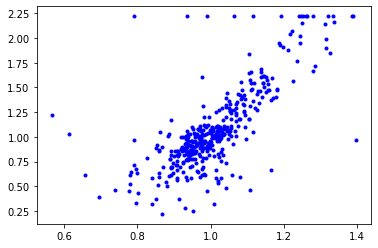

In [20]:
plt.plot(x_train,y_train,'b.')

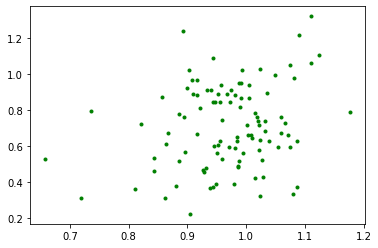

In [21]:
plt.plot(x_test, y_test,'g.')

In [22]:
def hypothesis(a,b,x):
  return a*x + b

In [23]:
def error(a,b,x,y):
  e=0
  m=len(y)
  for i in range(m):
    e +=np.power((hypothesis(a,b,x[i])-y[i]),2)
    return (1/(2*m)) *e

In [24]:
def step_gradiet(a,b,x,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(x)
  for i in range(m):
    grad_a += 1/m * (hypothesis (a,b,x[i])-y[i]) *x[i]
    grad_b += 1/m * (hypothesis(a,b,x[i])-y[i])
    a=a- (grad_a * learning_rate)
    b= b- (grad_b * learning_rate)
    return a,b

In [42]:
def descend(initial_a, initial_b, x,y,learning_rate,iterations):
  a= initial_a
  b=initial_b
  for i in range(iterations):
    e=error(a,b,x,y)
    if i % 1000 ==0:
      print(f"Error:{e}, a:{a}, b:{b}")
      a,b=step_gradiet(a,b,x,y,learning_rate)
      return a,b

In [43]:
a=0
b=1
learning_rate= 0.01
iterations = 10000
final_a,final_b = descend(a,b,x_train,y_train,learning_rate, iterations)

Error:5.247264596403185e-06, a:0, b:1


In [38]:
print(error(a,b,x_train, y_train))
print(error(final_a,final_b,x_train,y_train))

5.247264596403185e-06
5.246720521225209e-06


In [39]:
print(error(final_a,final_b,x_test,y_test))


0.0019012211856624316


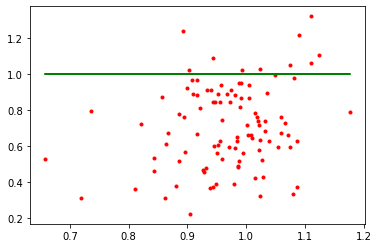

In [40]:
plt.plot(x_test, y_test,'r.', x_test,hypothesis(final_a, final_b, x_test), 'g')